# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [30]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
# 데이터 로딩


,num,date_time,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유,전력사용량(Wh)
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,8179056.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,8135640.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,8107128.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,8048808.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,8043624.0


### countplot (막대그래프)

<AxesSubplot:xlabel='기온', ylabel='count'>

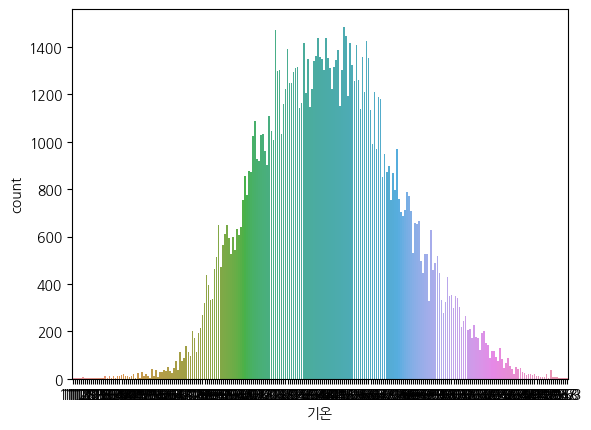

In [21]:
# 쉬운 방법으로 barplot 구현이 가능하다.


### histplot (히스토그램)

<AxesSubplot:xlabel='풍속', ylabel='Count'>

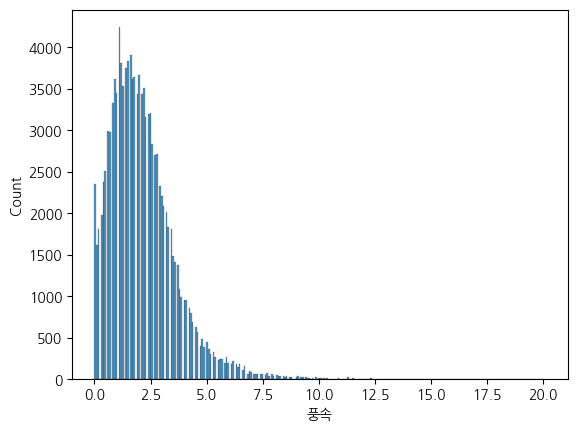

### scatterplot (산점도)

<AxesSubplot:xlabel='강수량', ylabel='전력사용량'>

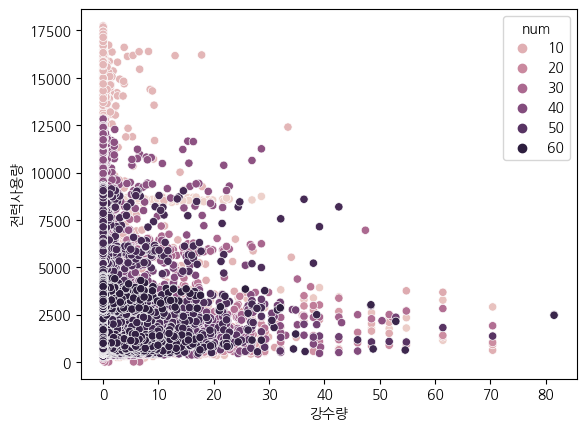

### boxplot

Index(['num', 'date_time', '전력사용량', '기온', '풍속', '습도', '강수량', '일조', '비전기냉방설비운영',
       '태양광보유', '전력사용량(Wh)'],
      dtype='object')

<AxesSubplot:xlabel='일조', ylabel='전력사용량'>

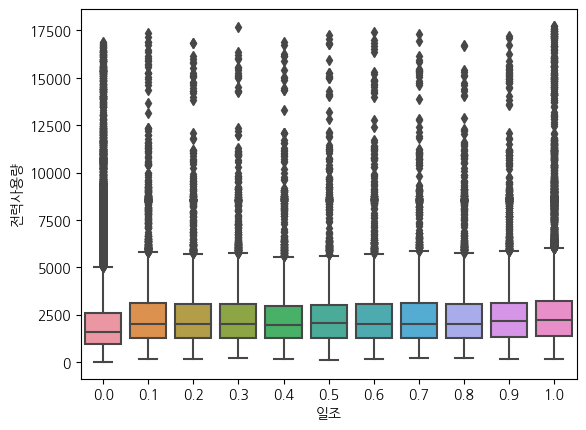

In [24]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.


### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

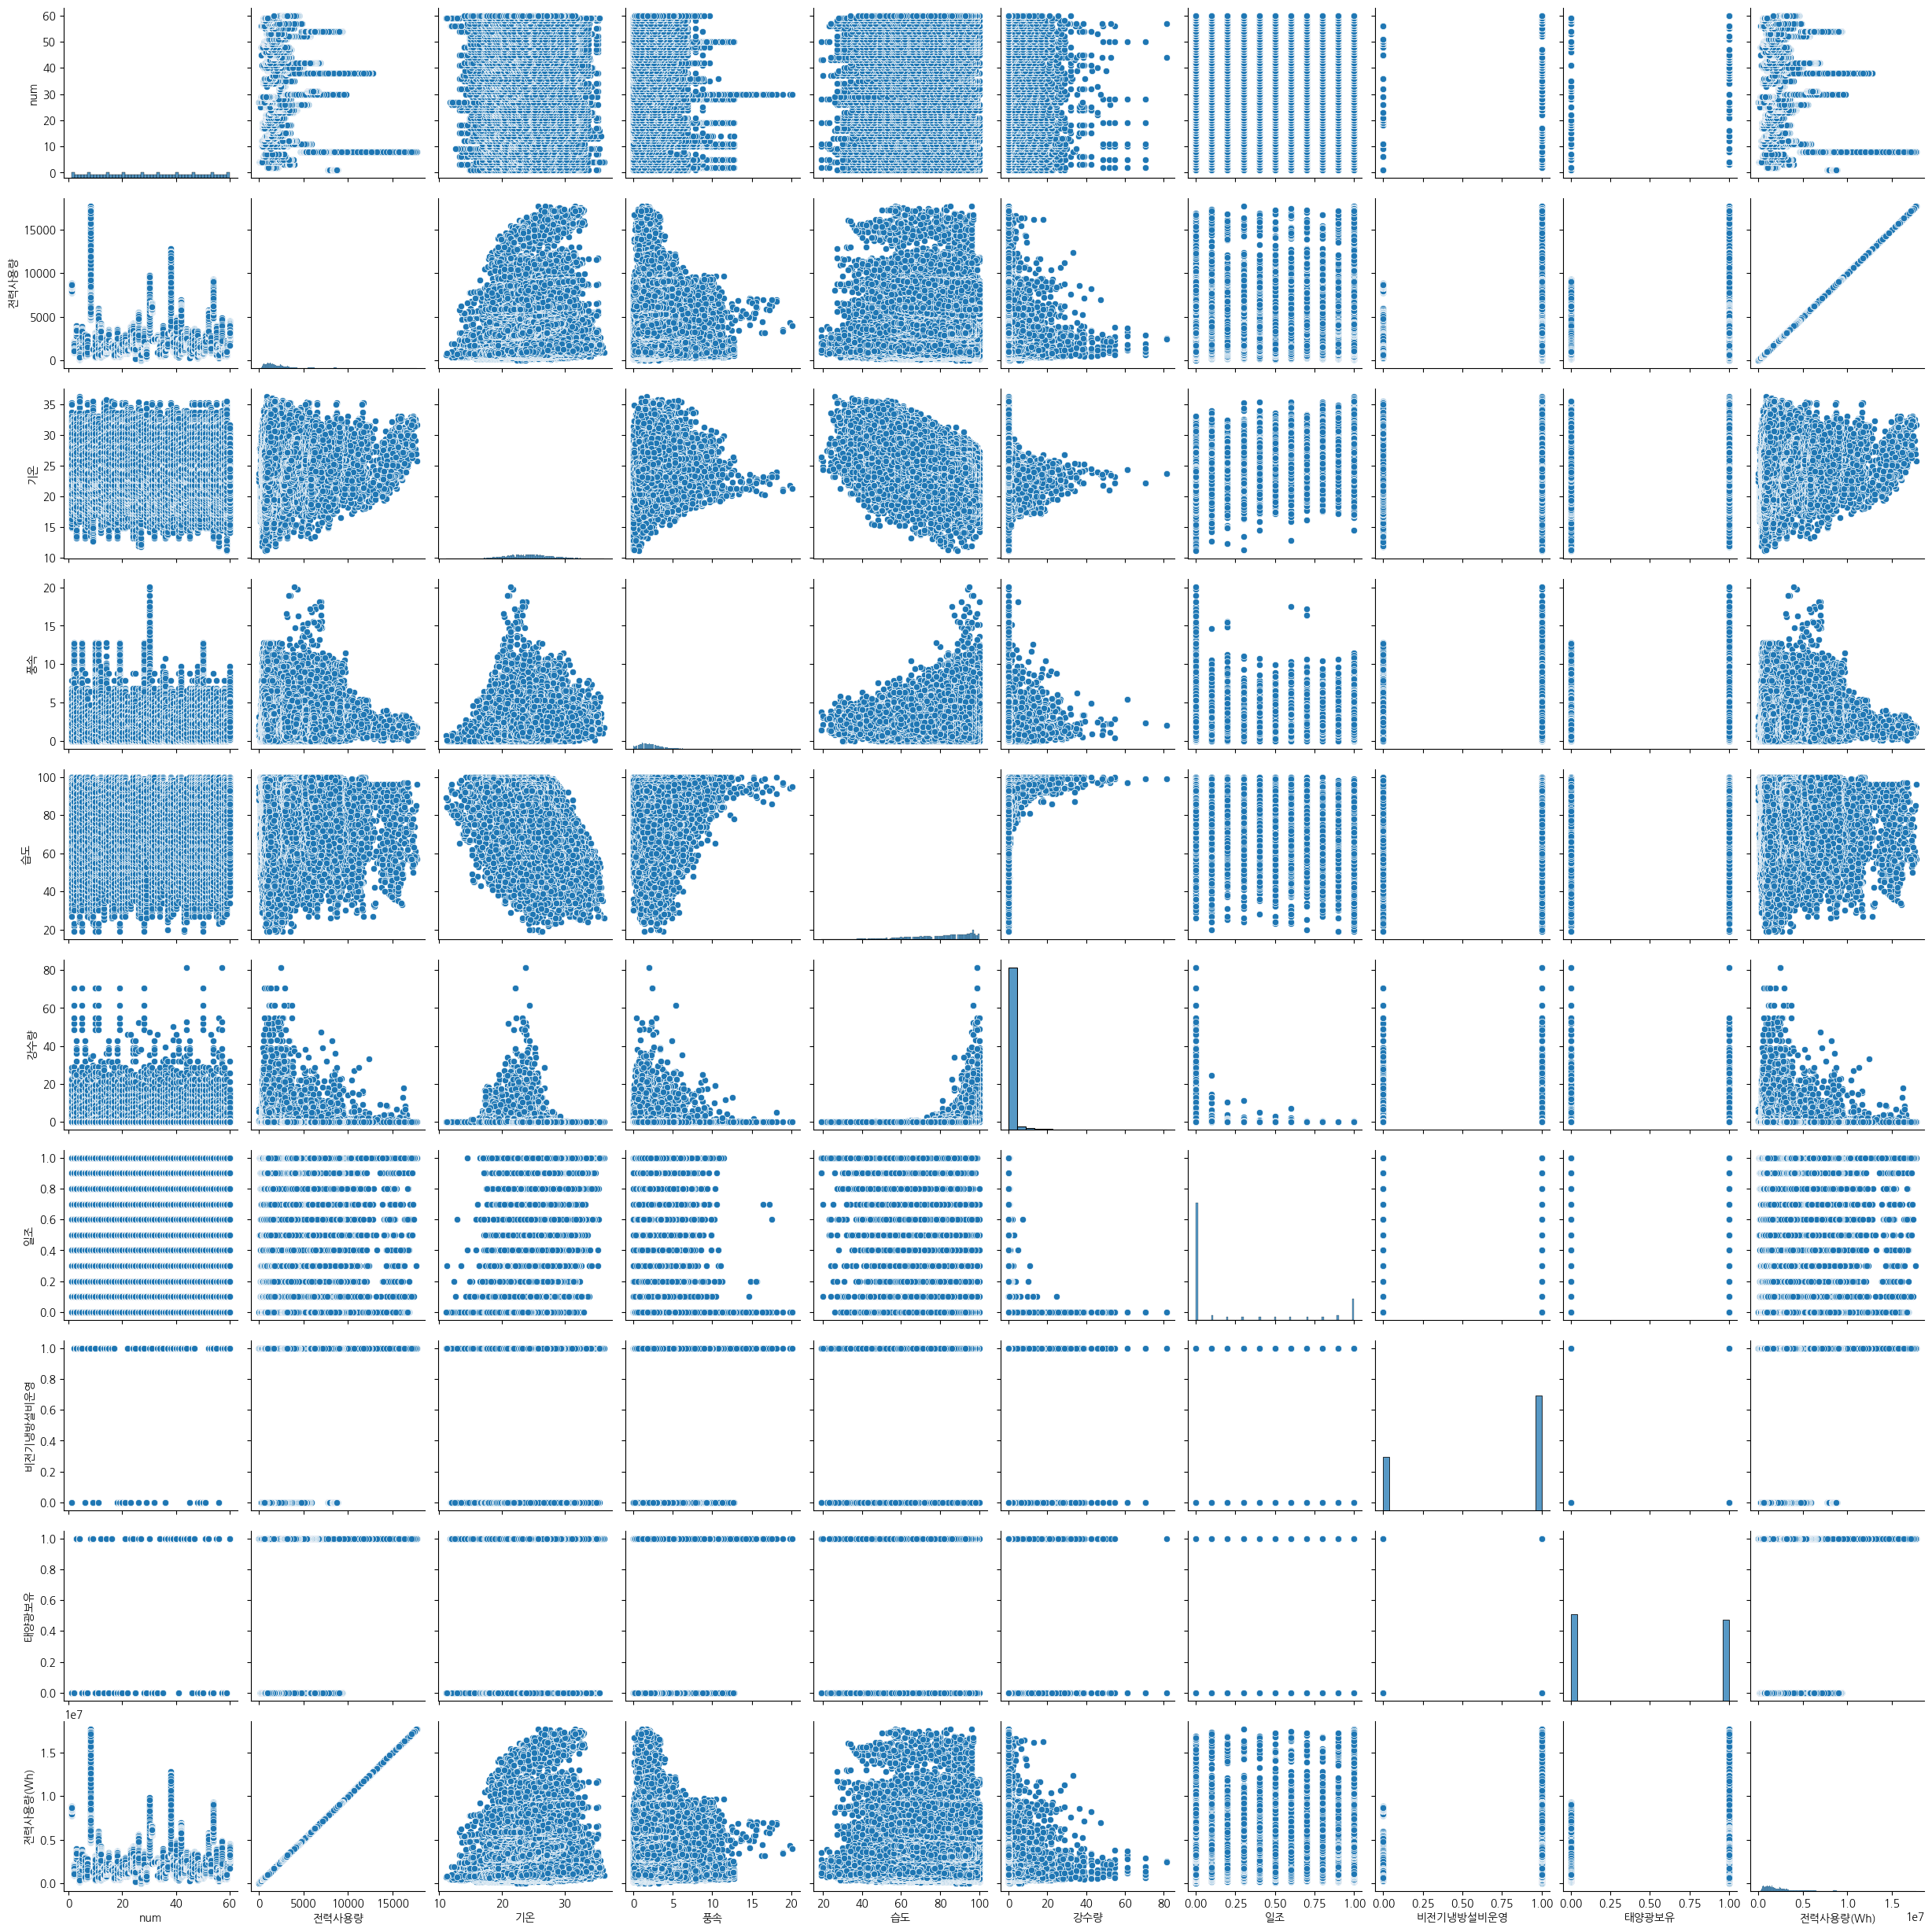

In [25]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot


### heatmap
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

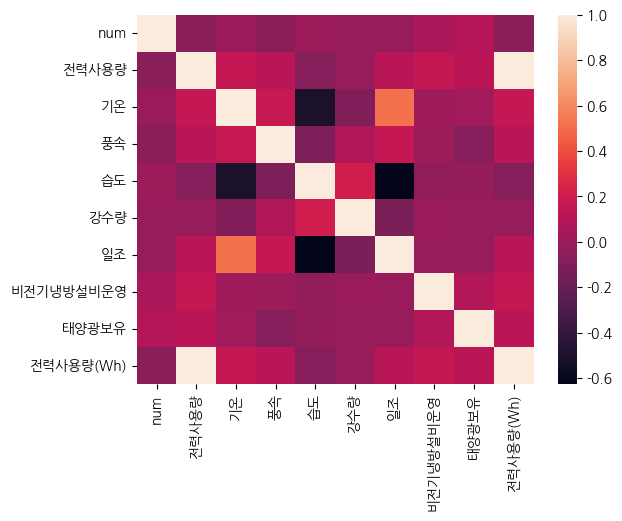